# Clean data

## 1. EN : Loading the data - FR : Chargement des données

### 1.1.1. EN : Import of libraries - FR : Import des bibliothèques

1. **NumPy (`numpy`)** :  
    EN : Library to do fast numeric calculations and work with multidimensional arrays.  
    FR : Bibliothèque pour faire des calculs numériques rapides et manipuler des tableaux multidimensionnels.  
2. **Pandas (`pandas`)** :  
    EN : Powerful tool to read, organize, analyze and transform data in table format.  
    FR : Outil puissant pour lire, organiser, analyser et transformer des données sous forme de tableaux.  
3. **Seaborn (`seaborn`)** :  
    EN : Visualization library that helps create elegant statistical charts easily.  
    FR : Bibliothèque de visualisation qui permet de créer facilement des graphiques statistiques élégants.  
4. **Matplotlib (`matplotlib` )** :  
    EN : Basic library to create charts in Python with a lot of customization.  
    FR : Bibliothèque de base pour créer des graphiques en Python avec beaucoup de personnalisation.  
5. **Matplotlib.puplot (`matplotlib.pyplot`)** :  
    EN : Simplified interface of matplotlib to quickly create charts.  
    FR : Interface simplifiée de matplotlib pour créer rapidement des graphiques.
6. **Matplotlib.ticker (`matplotlib.ticker`)** :
6. **CSV (`csv`)** :  
    EN : Standard Python module to read and write CSV files (data separated by commas).  
    FR : Module standard de Python pour lire et écrire des fichiers CSV (données séparées par des virgules).  


In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import csv

### 1.1.2. EN : Importing the CSV file and reading it using Pandas - FR : Importation du fichier csv et lecture grâce à Pandas - 

In [150]:
df = pd.read_csv('/Users/santodacquisto/Desktop/BeCode/2. A.I. Bootcamp/Exercice/immo-eliza-data-exploration-milan/datasets/Kangaroo.csv')
df.head() # EN Preview of the beginning of the dataset - FR Aperçu du début du datase

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


### 1.2. EN : Remove duplicates and unnecessary columns - FR : Supprimer les doublons et des colonnes inutiles

In [151]:
df = df.drop_duplicates() # EN Remove duplicates - FR Supprimer les doublons
df = df.drop(columns=['url', 'Unnamed: 0']) # EN Drop unnecessary columns - FR Supprimer les colonnes inutiles


print("Number of duplicates :", df.duplicated().sum()) # EN Check if there are duplicates - FR Vérifiez s'il y a des doublons
print(df.columns)


Number of duplicates : 1
Index(['id', 'type', 'subtype', 'bedroomCount', 'bathroomCount', 'province',
       'locality', 'postCode', 'habitableSurface', 'roomCount', 'monthlyCost',
       'hasAttic', 'hasBasement', 'hasDressingRoom', 'diningRoomSurface',
       'hasDiningRoom', 'buildingCondition', 'buildingConstructionYear',
       'facedeCount', 'floorCount', 'streetFacadeWidth', 'hasLift',
       'floodZoneType', 'heatingType', 'hasHeatPump', 'hasPhotovoltaicPanels',
       'hasThermicPanels', 'kitchenSurface', 'kitchenType', 'landSurface',
       'hasLivingRoom', 'livingRoomSurface', 'hasBalcony', 'hasGarden',
       'gardenSurface', 'gardenOrientation', 'parkingCountIndoor',
       'parkingCountOutdoor', 'hasAirConditioning', 'hasArmoredDoor',
       'hasVisiophone', 'hasOffice', 'toiletCount', 'hasSwimmingPool',
       'hasFireplace', 'hasTerrace', 'terraceSurface', 'terraceOrientation',
       'accessibleDisabledPeople', 'epcScore', 'price'],
      dtype='object')


### 1.3. EN : Remove spaces in strings - FR : Supprimer les espaces dans les chaînes de caractères

In [127]:
for column in df.select_dtypes(include=['object']).columns: # EN Remove leading and trailing spaces from string columns - FR Supprimer les espaces de début et de fin des colonnes de chaîne
    df[column] = df[column].astype(str).str.strip() # EN Convert all columns to string and remove leading and trailing spaces - FR Convertir toutes les colonnes en chaîne et supprimer les espaces de début et de fin


### 1.4. EN : Checking for missing values (NA) - FR : Vérification des valeurs manquantes (NA)

In [144]:
missing_values = df.isnull().sum() # EN Check for missing values in the dataset - FR Vérifiez les valeurs manquantes dans le jeu de données
print(missing_values) # EN Display the number of missing values for each column - FR Afficher le nombre de valeurs manquantes pour chaque colonne


id                           0
type                         0
subtype                      0
bedroomCount                 0
bathroomCount                0
province                 67780
locality                     0
postCode                     0
habitableSurface             0
hasAttic                     0
hasBasement                  0
hasDressingRoom              0
hasDiningRoom                0
buildingCondition            0
hasLift                      0
floodZoneType                0
heatingType                  0
hasHeatPump                  0
hasPhotovoltaicPanels        0
hasThermicPanels             0
kitchenType                  0
hasLivingRoom                0
hasGarden                    0
gardenOrientation            0
hasAirConditioning           0
hasArmoredDoor               0
hasVisiophone                0
hasOffice                    0
hasSwimmingPool              0
hasFireplace                 0
hasTerrace                   0
terraceOrientation           0
epcScore

### 1.4.1. EN : Remove columns with too many missing values - FR : Supprimer les colonnes avec trop de valeurs manquantes

In [129]:
df = df.dropna(thresh=len(df)*0.8, axis=1) # EN Drop columns with more than 80% missing values - FR Supprimer les colonnes avec plus de 80 % de valeurs manquantes

### 1.4.2. EN : Impute missing values for important columns - FR : Imputer les valeurs manquantes pour les colonnes importantes

In [130]:
df.loc[:, 'bedroomCount'] = df['bedroomCount'].fillna(df['bedroomCount'].median()) # EN Fill missing values in 'bedroomCount' with the median - FR Remplir les valeurs manquantes dans 'bedroomCount' avec la médiane
df.loc[:, 'bathroomCount'] = df['bathroomCount'].fillna(df['bathroomCount'].median()) # EN Fill missing values in 'bathroomCount' with the median - FR Remplir les valeurs manquantes dans 'bathroomCount' avec la médiane  


### 1.4.3. EN : Qualitative columns, impute with the most frequent value. - FR : Colonnes qualitatives, imputer par la modalité la plus fréquente.

In [131]:
for column in df.select_dtypes(include=['object']).columns: 
    df.loc[:, column] = df[column].fillna(df[column].mode()[0])


### 1.4.4. EN : Remove missing values in the price column - FR : Suppressions des valeurs manquantes dans la colonne price

In [132]:
df = df.dropna(subset=['price']) # EN Drop rows with missing values in 'price' - FR Supprimer les lignes avec des valeurs manquantes dans 'price'
df = df.dropna(subset=['habitableSurface']) # EN Drop rows with missing values in 'habitableSurface' - FR Supprimer les lignes avec des valeurs manquantes dans 'habitableSurface'

## 2. EN : Analyze the data - FR : Analyser les données

### 2.1. EN : Check the structure of the DataFrame - FR : Vérifier la structure du DataFrame  

    EN : Check how many rows and columns are in your DataFrame, as well as the associated data types.  
    FR : Vérifier combien de lignes et de colonnes se trouvent dans ton DataFrame, ainsi que les types de données associés.

In [133]:
print(f"Number of rows : {df.shape[0]}") # EN Show number of rows - FR Afficher le nombre de lignes
print(f"Number of columns : {df.shape[1]}") # EN Show number of columns - FR Afficher le nombre de colonnes

print(df.dtypes) # EN Show data types of each column - FR Afficher les types de données de chaque colonne


Number of rows : 67780
Number of columns : 34
id                       float64
type                      object
subtype                   object
bedroomCount             float64
bathroomCount            float64
province                  object
locality                  object
postCode                   int64
habitableSurface         float64
hasAttic                  object
hasBasement               object
hasDressingRoom           object
hasDiningRoom             object
buildingCondition         object
hasLift                   object
floodZoneType             object
heatingType               object
hasHeatPump               object
hasPhotovoltaicPanels     object
hasThermicPanels          object
kitchenType               object
hasLivingRoom             object
hasGarden                 object
gardenOrientation         object
hasAirConditioning        object
hasArmoredDoor            object
hasVisiophone             object
hasOffice                 object
hasSwimmingPool           obje

### 2.2. EN : Descriptive statistics for numeric columns - FR : Statistiques descriptives pour les colonnes numériques  

EN : Get a statistical summary of the numeric columns (mean, median, standard deviation, etc.) to have an overview of the data distribution.  
FR : Obtenir un résumé statistique des colonnes numériques (moyenne, médiane, écart-type, etc.) pour avoir un aperçu de la distribution des données.

In [134]:
print(df.describe()) # EN Show summary statistics of the dataset - FR Afficher les statistiques descriptives du jeu de données

                 id  bedroomCount  bathroomCount      postCode  \
count  6.778000e+04  67780.000000   67780.000000  67780.000000   
mean   1.969586e+07      2.996872       1.385438   5132.113323   
std    2.660863e+06      1.725814       4.503066   3050.761961   
min    1.882546e+06      1.000000       1.000000   1000.000000   
25%    2.037479e+07      2.000000       1.000000   2240.000000   
50%    2.053634e+07      3.000000       1.000000   4500.000000   
75%    2.061756e+07      4.000000       1.000000   8400.000000   
max    2.066439e+07    100.000000    1146.000000   9992.000000   

       habitableSurface         price  
count      67780.000000  6.778000e+04  
mean         178.500856  4.547746e+05  
std          820.896900  5.138460e+05  
min            6.000000  9.000000e+03  
25%           93.000000  2.380000e+05  
50%          140.000000  3.350000e+05  
75%          200.000000  4.870000e+05  
max       185347.000000  1.500000e+07  


### 2.3. EN : Analyze the qualitative variables - FR : Analyser les variables qualitatives  

EN : For qualitative variables (strings, booleans, etc.), analyze the distribution of values. For example, for each column of type object, look at the most frequent values.  
FR : Pour les variables qualitatives (chaînes de caractères, booléennes, etc.),  analyser la répartition des valeurs. Par exemple, pour chaque colonne de type object, regarder les modalités les plus fréquentes.

In [88]:
for column in df.select_dtypes(include=['object']).columns: # EN Check the unique values for qualitative columns - FR Vérifier les valeurs uniques pour les colonnes qualitatives
    print(f"{column}:") # EN Display the unique values for each qualitative column - FR Afficher les valeurs uniques pour chaque colonne qualitative
    print(df[column].value_counts()) # EN Display the count of each unique value - FR Afficher le nombre de chaque valeur unique
    print("-" * 50) # EN Separator for better readability - FR Séparateur pour une meilleure lisibilité


type:
type
HOUSE        39005
APARTMENT    28775
Name: count, dtype: int64
--------------------------------------------------
subtype:
subtype
HOUSE                   29313
APARTMENT               21994
VILLA                    3407
APARTMENT_BLOCK          1959
GROUND_FLOOR             1686
DUPLEX                   1593
MIXED_USE_BUILDING       1531
FLAT_STUDIO              1235
PENTHOUSE                1204
EXCEPTIONAL_PROPERTY      724
MANSION                   498
TOWN_HOUSE                431
SERVICE_FLAT              415
BUNGALOW                  378
COUNTRY_COTTAGE           270
KOT                       269
LOFT                      241
FARMHOUSE                 213
CHALET                    144
TRIPLEX                   138
CASTLE                     57
MANOR_HOUSE                44
OTHER_PROPERTY             35
PAVILION                    1
Name: count, dtype: int64
--------------------------------------------------
province:
province
West Flanders      12457
Antwerp         

## 3. EN : Data visualization - FR : Visualisation des données

### EN : - FR : Distribution des prix

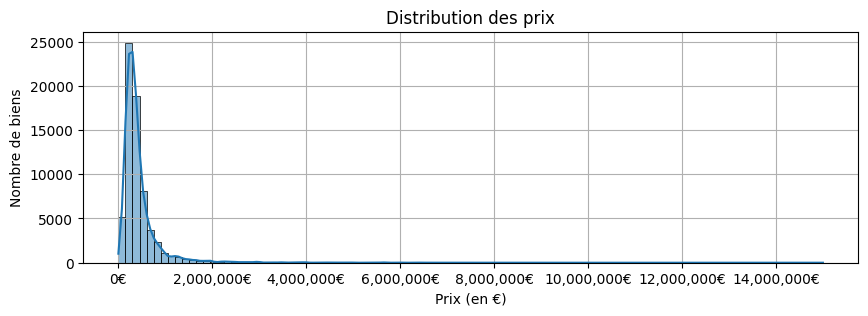

In [135]:
plt.figure(figsize=(10, 3)) # EN Set the figure size - FR Définir la taille de la figure
sns.histplot(df['price'], bins=100, kde=True) # EN Create a histogram with kernel density estimation - FR Créer un histogramme avec estimation de la densité du noyau
plt.title('Distribution des prix') # EN Set the title of the plot - FR Définir le titre du tracé
plt.xlabel('Prix (en €)') # EN Set the x-axis label - FR Définir l'étiquette de l'axe des x
plt.ylabel('Nombre de biens') # EN Set the y-axis label - FR Définir l'étiquette de l'axe des y
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}€'))  # Ajout du séparateur de milliers et du symbole €
plt.grid(True) # EN Add grid lines - FR Ajouter des lignes de grille
plt.show() # EN Show the plot - FR Afficher le tracé 



## EN :  - FR : Heatmap de corrélation

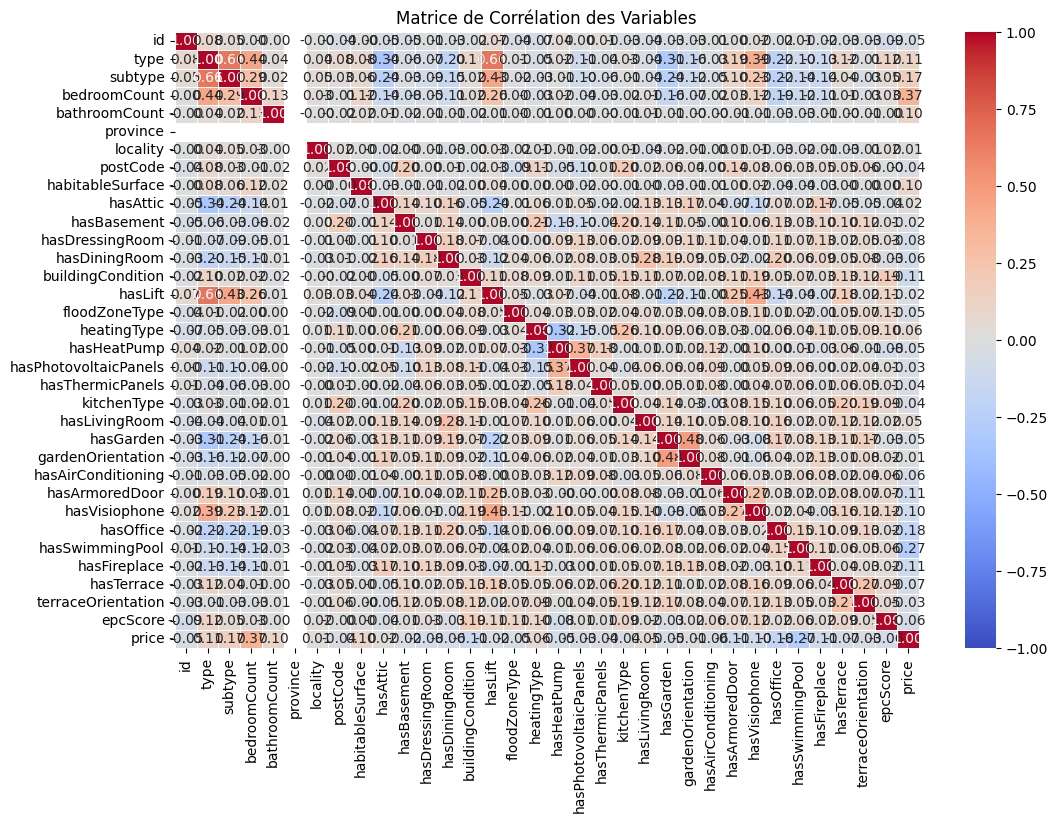

In [136]:
# Encoder les variables qualitatives sous forme numérique
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category').cat.codes

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Titre et labels
plt.title('Matrice de Corrélation des Variables')
plt.show()

## FR : Boxplot pour visualiser la distribution des prix par type de bien

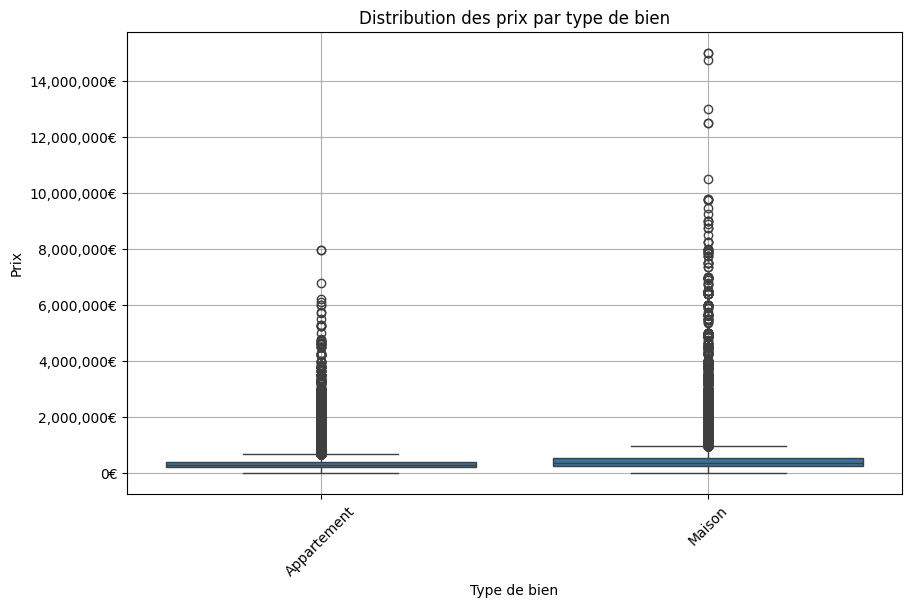

In [156]:
# Filtrer les données pour ne garder que 'Appartement' et 'Maison'
df_filtered = df[df['type'].isin(['Appartement', 'Maison'])]

# Boxplot de la distribution des prix par type de bien
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='price', data=df_filtered)
plt.title('Distribution des prix par type de bien')
plt.xlabel('Type de bien')
plt.ylabel('Prix')

# Rotation des labels sur l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)

# Appliquer le formattage des valeurs de l'axe Y en €
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}€'))

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.show()


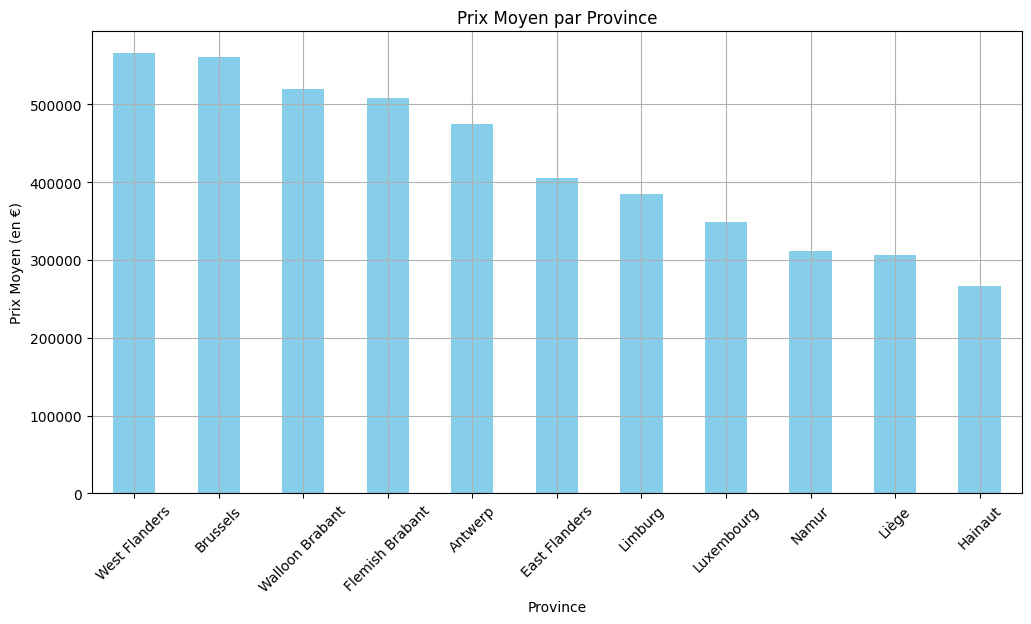

In [153]:
# Calcul des prix moyens par province
avg_price_by_province = df.groupby('province')['price'].mean().sort_values(ascending=False)

# Diagramme en barres pour les prix moyens par province
plt.figure(figsize=(12, 6))
avg_price_by_province.plot(kind='bar', color='skyblue')
plt.title('Prix Moyen par Province')
plt.xlabel('Province')
plt.ylabel('Prix Moyen (en €)')

# Rotation des labels sur l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.show()
